#BlueBerry Winery - Data Analytics

In [625]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [626]:
# Read a CSV file with semicolon as the delimiter -- #######add sep=;!!!#######

df_red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

display(df_red_wine)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [627]:
df_white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

display(df_white_wine)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [628]:
# Combine the datasets into a single dataframe
df_wine = pd.concat([df_white_wine.assign(wine_type='white'), 
                     df_red_wine.assign(wine_type='red')], ignore_index=True)

# Define the quality labels
quality_labels = ['Low', 'Medium', 'High']

# Categorize the quality values into labels
df_wine['quality_label'] = pd.Categorical(df_wine['quality'].apply(lambda x: quality_labels[int(x//4)]))




In [629]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,Medium


In [630]:
df_wine.quality_label.unique()

['Medium', 'High', 'Low']
Categories (3, object): ['High', 'Low', 'Medium']

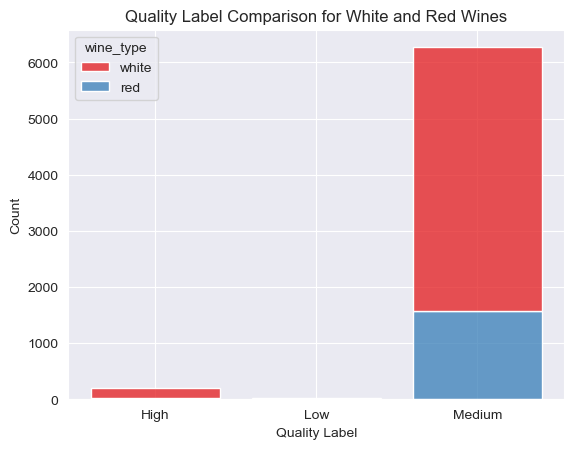

In [631]:
# Plot the histogram using seaborn
sns.histplot(data=df_wine, x='quality_label', hue='wine_type', multiple='stack', shrink=0.8)

# Add labels and title
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.title('Quality Label Comparison for White and Red Wines')

# Show the plot
plt.show()

In [632]:
df_red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#Different Tyeps of Data
#Plotting EDA

<AxesSubplot:xlabel='pH', ylabel='Count'>

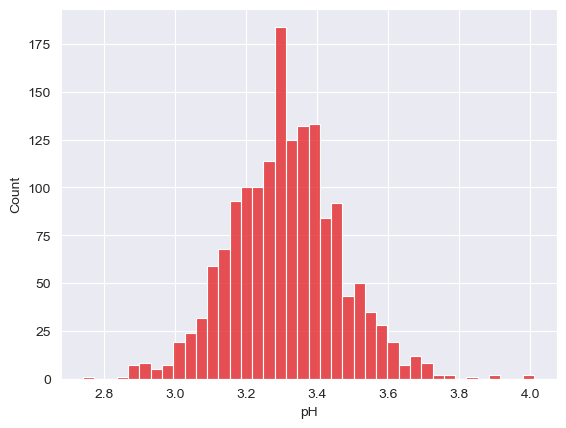

In [633]:


# Create a sample data frame
data = df_red_wine


# Use seaborn to create a histogram of the data
sns.histplot(data=df_red_wine, x="pH")


In [636]:



# Create a sample data frame
data = df_red_wine


# Use seaborn to create a histogram of the data
sns.histplot(data=df_red_wine, x="qaulity")


ValueError: Could not interpret value `qaulity` for parameter `x`

#Sprint 4_Projerct2: Epic 3: Data Wrangling

In [ ]:
#print the first 10 and the last 10 records (use head() and tail() methods)
df_red_wine.head(11)


In [ ]:
#print the first 10 and the last 10 records (use head() and tail() methods)
df_red_wine.tail(11)

In [ ]:

import pandas as pd

df_red_wine.info


In [ ]:

import pandas as pd

df_red_wine.describe


In [ ]:
#info and the shape (use info() and shape methods)

df_red_wine.shape

(1599, 12)

In [ ]:
#info and the shape (use info() and shape methods)

df_red_wine.info()

In [ ]:
import pandas as pd

# count missing values in each column for bigger dataset
missing_values_count = df_red_wine.isnull().sum()

print(missing_values_count)

total_missing = missing_values_count.sum()

print(f'Total missing values: {total_missing}')



In [ ]:
#observe if there are missing values (use isna(), isnull()

df_red_wine.isna()


In [ ]:
df_red_wine.isnull()

In [ ]:
###group our qualities into 3 categories: low, medium and high quality wines.

# we are creating a new column called "quality_label", we define a range and associate that range with a label
df_red_wine['quality_label'] = df_red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')


# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
df_red_wine['quality_label'] = pd.Categorical(df_red_wine['quality_label'],
categories=['low', 'medium', 'high'])

df_red_wine

In [ ]:
#Import library 
import seaborn as sns
import matplotlib.pyplot as plt

#####WHITE WINE#######

In [ ]:
# Read a CSV file with semicolon as the delimiter -- #######add sep=;!!!#######


import pandas as pd
df_white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

display(df_white_wine)


In [ ]:
#print the first 10 and the last 10 records (use head() and tail() methods)
df_red_wine.head(10)


In [ ]:
df_red_wine.tail(10)

In [ ]:
df_white_wine.shape

In [ ]:
df_white_wine.describe

In [ ]:
df_white_wine.info

In [ ]:
import pandas as pd

# count missing values in each column for bigger dataset
missing_values_count = df_white_wine.isnull().sum()

print(missing_values_count)

total_missing = missing_values_count.sum()

print(f'Total missing values: {total_missing}')

In [ ]:
df_red_wine.isna()


In [ ]:
#White
# we are creating a new column called "quality_label", we define a range and associate that range with a label
df_white_wine['quality_label'] = df_white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
df_white_wine['quality_label'] = pd.Categorical(df_white_wine['quality_label'], categories=['low', 'medium', 'high'])




df_white_wine

In [ ]:
#RED
# we are creating a new column called "quality_label", we define a range and associate that range with a label
df_white_wine['quality_label'] = df_red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categorical data type (specific to pandas) instead of simple string
df_red_wine['quality_label'] = pd.Categorical(df_red_wine['quality_label'], categories=['low', 'medium', 'high'])


df_red_wine



In [ ]:
df_red_wine['alcohol']

In [ ]:
df_red_wine

In [ ]:
pd.concat([df_red_wine.describe(), df_white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"])

#Only numerical (concat)



In [ ]:
df_red_wine

#In Pandas, the axis parameter specifies the dimension of an operation. For a DataFrame, axis=0 refers to the rows and axis=1 refers to the columns#

In [ ]:
pd.concat([df_red_wine.describe(), df_white_wine.describe()], axis=0, keys=["Red Wines Stats", "White Wines Stats"])


#####pd.concat([df_red_wine.describe(), df_white_wine.describe()], axis=1, keys=["Red Wines Stats", "White Wines Stats"]) is a pandas function call that concatenates the summary statistics of two dataframes - df_red_wine and df_white_wine.

The describe() method is used to compute various summary statistics of the dataframes, such as count, mean, standard deviation, minimum, maximum, and quartiles.

The concat() method concatenates the two dataframes along the columns axis (axis=1) and adds keys to the resulting dataframe for identifying the original dataframes. The keys parameter specifies the names of the keys to be used for the two dataframes, which are "Red Wines Stats" and "White Wines Stats", respectively.

By doing this, we can compare the summary statistics of the red and white wines side-by-side in a single dataframe, making it easier to identify any differences between the two datasets.####

#What can we do? We can compare the means of the different attributes between the two datasets to see if there are any significant differences. For example, we can compare the mean alcohol content, pH levels, or acidity levels between the red and white wines.
We can look at the ranges of values for each attribute to see if one dataset has more extreme values than the other. This could indicate that one type of wine is generally more acidic or has a higher alcohol content than the other.
We can compare the quartiles for each attribute to see if there are any differences in the distribution of values. For example, one dataset might have a wider range of values in the upper quartile for alcohol content than the other.

In [ ]:
###You can observe that the mean value of sulfates and volatile acidity seem to be higher in red wine as compared to white wine
(0.658 vs. 0.484)

we can compare the mean alcohol content, pH levels, or acidity levels between the red and white wines.
This could indicate that one type of wine is generally more acidic or has a higher alcohol content than the other.

In [ ]:
#PH levels mean
Red = 3.311113
White =3.188267

#fixed acidity mean#	
Red = 8.319637
White = 6.854788

#Density mean
Red = 0.996747
White = 0.994027	

# Residual sugar mean
Red = 2.538806	
White = 6.391415

#Mean quality of white wine seem to be slightly better.

#Red wines have a higher fixed acidity level on average than white wines. This could contribute to a more pronounced tartness or sourness in red wines compared to white wines.
#White wines have a higher pH level and residual sugar level on average than red wines. This could contribute to a sweeter taste and a softer, more rounded mouthfeel in white wines.
#White wines have a lower density on average than red wines, which could make them feel lighter and more refreshing.

/Users/nataliemac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


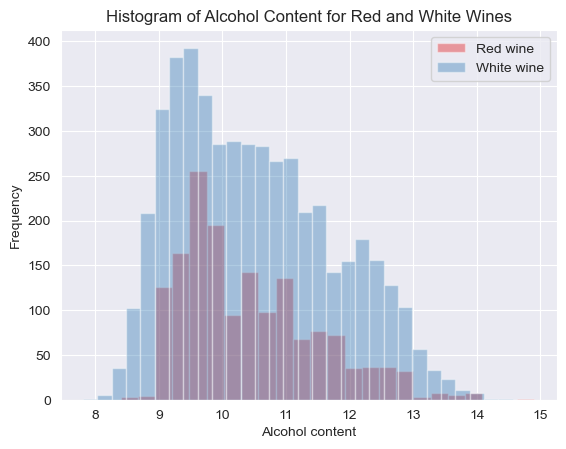

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load example wine data
df_red_wine = pd.read_csv('winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Generate example data
data1 = df_red_wine['alcohol']
data2 = df_white_wine['alcohol']

# Add noise to data2 to make the histograms more distinct
data2 = data2 + np.random.normal(0, 0.2, size=len(data2))

# Create histogram using Seaborn
sns.distplot(data1, kde=False, label='Red wine')
sns.distplot(data2, kde=False, label='White wine')

# Add labels and legend
plt.xlabel('Alcohol content')
plt.ylabel('Frequency')
plt.title('Histogram of Alcohol Content for Red and White Wines')
plt.legend()

# Show plot
plt.show()


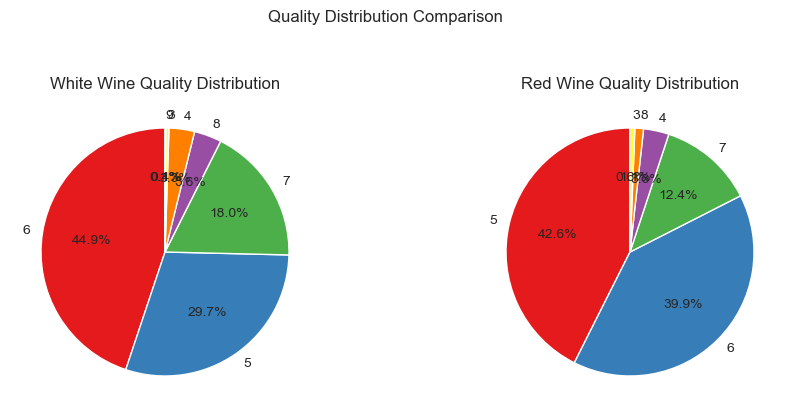

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts for quality in each dataframe
white_counts = df_white_wine['quality'].value_counts()
red_counts = df_red_wine['quality'].value_counts()


# Create a figure with two subplots
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121) # first subplot for white wine quality distribution
ax2 = fig.add_subplot(122) # second subplot for red wine quality distribution

# Plot a pie chart for each subplot
ax1.pie(white_counts, labels=white_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('White Wine Quality Distribution')
ax2.pie(red_counts, labels=red_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Red Wine Quality Distribution')



# Add a common title for the figure, adjust subplot spacing, and show the plot
fig.suptitle('Quality Distribution Comparison')
plt.subplots_adjust(wspace=0.5)
plt.show()


<AxesSubplot:xlabel='quality', ylabel='Count'>

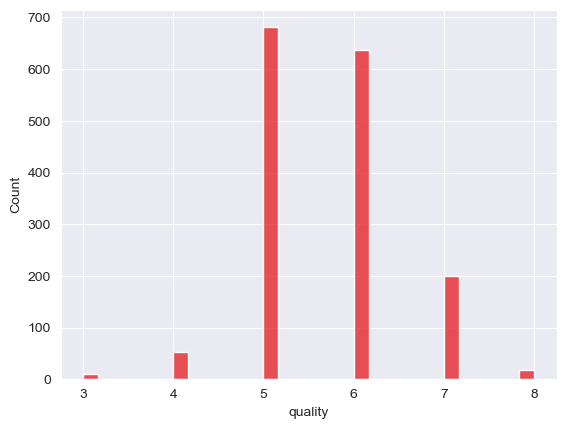

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a histogram of the quality ratings for red wines
sns.histplot(data=df_red_wine, x="quality")




<AxesSubplot:xlabel='alcohol', ylabel='quality'>

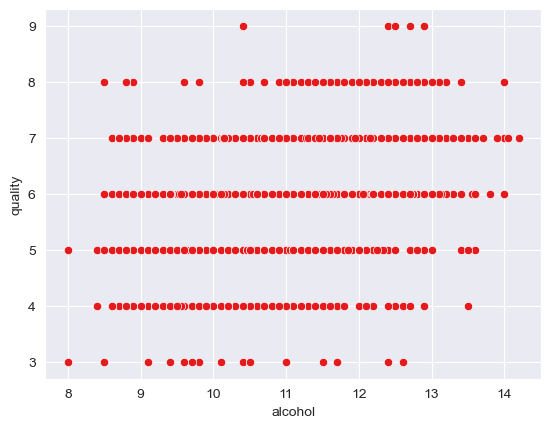

In [639]:
import pandas as pd
import seaborn as sns


# Create a scatterplot of alcohol content vs. quality for white wines
sns.scatterplot(data=df_white_wine, x="alcohol", y="quality")





Text(0.5, 1.0, 'White_Wine')

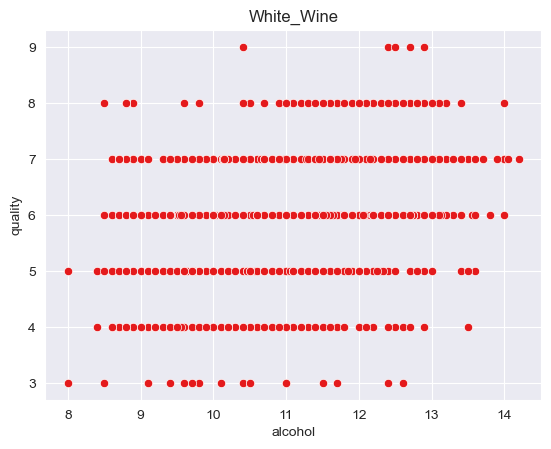

In [638]:
# Create a scatterplot of alcohol content vs. quality for white wines
sns.scatterplot(data=white_wines_df, x="alcohol", y="quality")
plt.title("White_Wine")



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


# Extract the quality columns from the dataset
red_quality = df_red_wine['quality'][df_red_wine['type'] == 'red']
white_quality = df_white_wine['quality'][ df_white_wine][['type'] == 'white']


# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 4, figsize=(16, 10))

# Plot histograms of each quality variable in the dataset
for i, col in enumerate(df_white_wine.columns[:-1]):
    ax = axs[i // 4, i % 4]
    ax.hist(df_white_wine[col][wine_data['type'] == 'red'], color='blue', alpha=0.5, label='Red')
    ax.hist(df_red_wine[col][wine_data['type'] == 'white'], color='orange', alpha=0.5, label='White')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend()

# Add a title to the figure
fig.suptitle('Distribution of Wine Qualities')


In [640]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of occurrences of each label in the dataset
label_counts = df_red_wine['quality_label'].value_counts()

# Create a pie chart of the label counts
fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Red Wine Quality Labels')

plt.show()


KeyError: 'quality_label'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of occurrences of each label in the dataset
label_counts = df_white_wine['quality_label'].value_counts()

# Create a pie chart of the label counts
fig, ax = plt.subplots()
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of White Wine Quality Labels')

plt.show()

KeyError: 'quality_label'

In [641]:


# create the new column 'quantity' by multiplying 'alcohol' and 'sulphates'
df_red_wine['quantity'] = df_red_wine['alcohol'] * df_red_wine['sulphates']


df_red_wine['quantity']


0       5.264
1       6.664
2       6.370
3       5.684
4       5.264
        ...  
1594    6.090
1595    8.512
1596    8.250
1597    7.242
1598    7.260
Name: quantity, Length: 1599, dtype: float64

In [ ]:
import pandas as pd


# create the new column 'quantity' by multiplying 'alcohol' and 'sulphates'
df_white_wine['quantity'] = df_white_wine['alcohol'] * df_white_wine['sulphates']


df_white_wine['quantity']

In [ ]:
pd.concat([df_red_wine.describe(), df_white_wine.describe()], axis=0, keys=["Red Wines Stats", "White Wines Stats"])


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# load data sets and select variables to compare
data1 =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
data2 =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
var1 = 'quantity'
var2 = 'quantity'

# calculate values for each data set
data1_counts = data1[var1].value_counts()
data1_percentages = data1_counts / data1_counts.sum() * 100
data2_counts = data2[var2].value_counts()
data2_percentages = data2_counts / data2_counts.sum() * 100

# create figure and axis
fig, ax = plt.subplots()

# create data and labels lists for each data set
data = [data1_percentages, data2_percentages]
labels = [data1_counts.index, data2_counts.index]

# create pie chart
ax.pie(data[0], labels=labels[0], autopct='%1.1f%%', startangle=90)
ax.pie(data[1], labels=labels[1], autopct='%1.1f%%', startangle=90, radius=0.75)

# add legend and title
ax.set_title('Comparison of {} and {}'.format(var1, var2))
ax.legend(['Data Set 1', 'Data Set 2'], loc='upper right')

# display chart
plt.show()


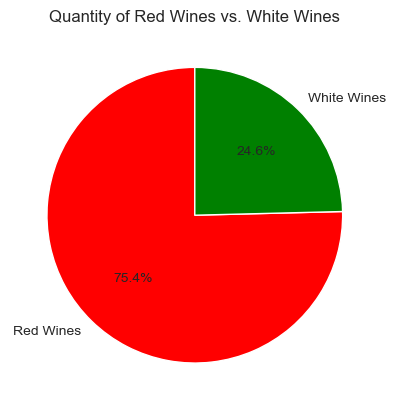

In [ ]:
#The first plot you should do is a pie chart, showing the quantity of red wines compared to the quantity of white wines.#

#I calculated the quantity and then created a pie chart by inserting the count into the sample data.
import matplotlib.pyplot as plt

# Sample data
red_wines =4897
white_wines = 1598

# Create a pie chart
labels = ['Red Wines', 'White Wines']
sizes = [red_wines, white_wines]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Quantity of Red Wines vs. White Wines')

# Show the plot
plt.show()


In [642]:
import seaborn as sns
import pandas as pd

sns.histplot(df_red_wine, x="quality_label", hue="quality_label")
plt.title("Red_Wine_Qaulity_Label")


ValueError: Could not interpret value `quality_label` for parameter `x`

In [ ]:
import seaborn as sns
import pandas as pd

sns.histplot(df_white_wine, x="quality_label", hue="quality_label")
plt.title("White_Wine_Qaulity_Label")


ValueError: Could not interpret value `quality_label` for parameter `x`

In [ ]:
import seaborn as sns
import pandas as pd

sns.histplot(df_white_wine, x="quality_label", hue="quality_label")
plt.title("White_Wine_Qaulity_Label")

import seaborn as sns
import pandas as pd

sns.histplot(df_red_wine, x="quality_label", hue="quality_labe")
plt.title("White_red_Qaulity_Label")


ValueError: Could not interpret value `quality_label` for parameter `x`

Text(0.5, 1.0, 'White_Wine')

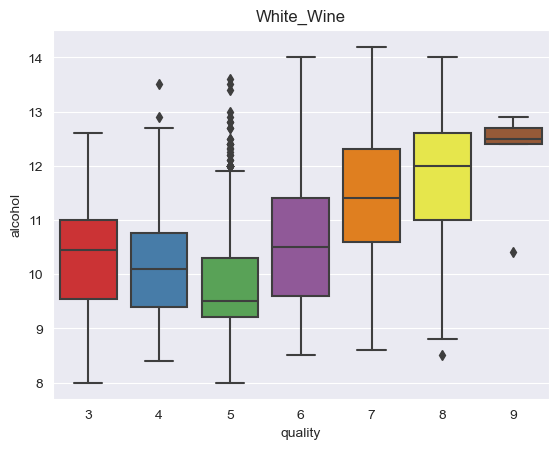

In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_white_wine, x="quality", y="alcohol")
plt.title("White_Wine")



In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_white_wine, x="quality", y="alcohol")

In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_red_wine, x="quality", y="alcohol")

plt.title("Red_Wine")

###data is needed for boxplot but not for histogram?###

In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_white_wine, x="quality_label", y="alcohol")
plt.title('White Wines')


In [ ]:
%matplotlib ipympl

#Differnet back, can change the size of the graphs 

In [ ]:
sns.boxplot(data=df_white_wine, x=df_white_wine ['fixed acidity'])
plt. xlabel('fixed acidity')
plt.title ('')
plt.show

In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_red_wine, x="quality_label", y="alcohol")
plt.title('Red Wines')


In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_red_wine, x="quality_label", y="pH")
plt.title('Red Wines')


In [ ]:
import seaborn as sns
import pandas as pd

sns.boxplot(data=df_white_wine, x="quality_label", y="pH")
plt.title('White Wines')

In [644]:
import seaborn as sns
import pandas as pd

sns.lineplot(data=df_white_wine, x="quality_label", y="density")
plt.title('White Wines')

ValueError: Could not interpret value `quality_label` for parameter `x`

In [643]:
import seaborn as sns
import pandas as pd

sns.lineplot(data=df_red_wine, x="quality_label",  y="density")
plt.title('Red Wines')

ValueError: Could not interpret value `quality_label` for parameter `x`

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette("Set1")

sns.lineplot(data=df_red_wine, x="quality_label", y="density", hue="alcohol")
plt.title('Red Wines')
plt.show()


###sns.set_palette() function is used to set the color palette for the plot. It accepts a color palette name, 
a list of colors, or a seaborn color palette object. 
Seaborn provides many built-in color palettes that you can use to customize the colors of the plot.

In the example I provided earlier, sns.set_style("darkgrid") sets the style of the plot to "darkgrid", 
which shows a dark background with grid lines. sns.set_palette("Set1") sets the color palette of the plot to "Set1", 
which is a qualitative palette of 9 colors###

In [ ]:
df_red_wine.corr
sns.heatmap(df_red_wine.corr())
plt.title("Heatmap")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette("Set1")

sns.lineplot(data=df_white_wine, x="quality_label", y="density", hue="alcohol")
plt.title('White Wines')
plt.show()


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Create heatmap
sns.heatmap(data=df_red_wine, cmap="BuPu")
plt.show()

In [ ]:
#correlation 


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_red_wine.corr()


In [ ]:
#Heatmap correlation red


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_red_wine.corr()

sns.heatmap(df_red_wine.corr(), );
plt.title("Red_Wine")



In [ ]:
#Heatmap correlation white


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_white_wine.corr()

sns.heatmap(df_white_wine.corr(),cmap="BuPu")
plt.title("White_Wine")


In [ ]:


sns.heatmap(df_red_wine, vmin=0, vmax=0.5)
plt.show()

# color bar range between 0.5 and 0.7
sns.heatmap(df_red_wine, vmin=0.5, vmax=0.7)
plt.title("Red_Wine")

plt.show()


In [ ]:


# color bar range between 0.5 and 0.7
sns.heatmap(df_red_wine, vmin=0.5, vmax=0.7)
plt.title("Red_Wine")
plt.show()

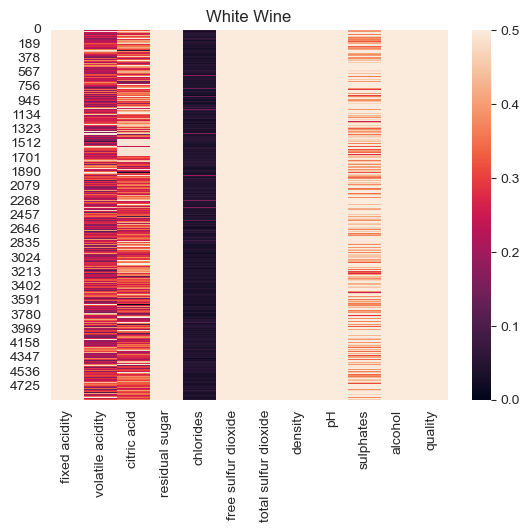

In [ ]:
sns.heatmap(df_white_wine, vmin=0, vmax=0.5)
plt.title("White Wine")
plt.show()

In [ ]:
sns.lineplot(data=df_white_wine, x="quality", y="alcohol")

plt.show()

#Sprint 4#

In [ ]:
df_red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

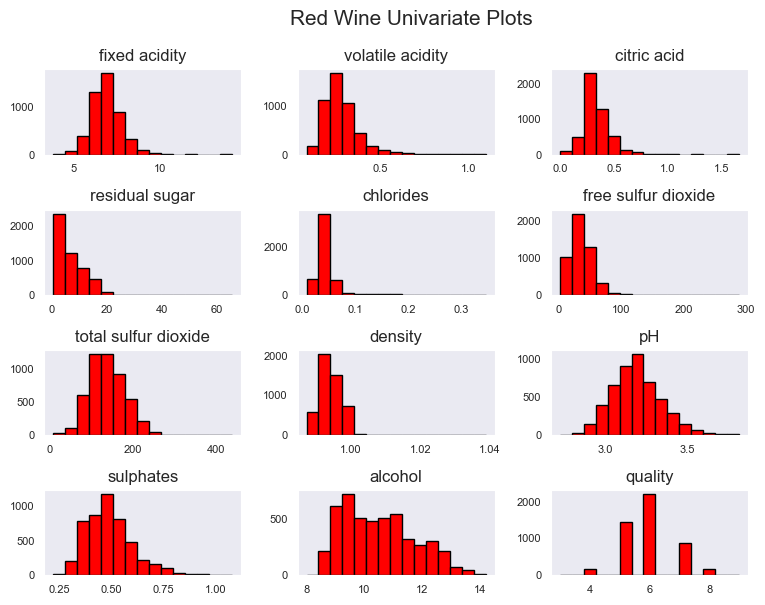

In [ ]:
df_white_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

In [ ]:
import pandas as pd
from scipy import stats


# Separate the data into red and white wines
red_wine = df_red_wine
white_wine = df_white_wine

# Perform ANOVA test
F, p = stats.f_oneway(red_wine[red_wine['quality_label'] == 'low']['alcohol'],
                      red_wine[red_wine['quality_label'] == 'medium']['alcohol'],
                      red_wine[red_wine['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)



KeyError: 'quality_label'

In [645]:
from scipy import stats

F, p = stats.f_oneway(df_red_wine[df_red_wine['quality_label'] == 'low']['alcohol'],
                      df_red_wine[df_red_wine['quality_label'] == 'medium']['alcohol'],
                      df_red_wine[df_red_wine['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)


KeyError: 'quality_label'

In [646]:
import pandas as pd
from scipy.stats import f_oneway


# Separate the data into red and white wines
red_wine = df_red_wine
white_wine = df_white_wine

# Conduct ANOVA for each variable
for col in data.columns[:-1]:
   _, p_value = f_oneway(red_wine[col], white_wine[col]) 
print(col, p_value)

quality 4.888069044194755e-22


#To use ANOVA test to compare the quality of red and white wine based on the variables you have listed, you could follow these steps:

Separate the data: Separate the data into two groups based on the type of wine - red wine and white wine.
Compute group means: Calculate the mean values for each variable for both groups separately.
Check assumptions: Check the assumptions of ANOVA, which include normality, homogeneity of variance, and independence.
Conduct ANOVA: Perform a one-way ANOVA to test if there is a significant difference between the means of the two groups for each variable#.


#In this code, we first load the wine data into a DataFrame. We then separate the data into two groups based on the type of wine using Boolean indexing. Finally, we use a for loop to iterate over each variable in the DataFrame and conduct ANOVA tests for each variable separately using the f_oneway() function from scipy.stats. The function returns the F-statistic and the p-value for each test. The p-value indicates whether there is a significant difference between the means of the two groups for each variable.

If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that there is a significant difference between the means of the two groups for that variable. In that case, we can perform post-hoc tests such as Tukey's HSD to identify which pairs of means are significantly different.#

#,The small p-value suggests that there is a significant difference in quality between the red and white wines, meaning that the null hypothesis (that there is no difference in quality between the two groups) can be rejected#

#Assuming that a higher quality score is better, I could compare the mean quality score for the red wine group to the mean quality score for the white wine group. If the mean quality score for the red wine group is higher, then I could conclude that red wine is better than white wine in terms of quality (at least based on the quality score used in the study). If the mean quality score for the white wine group is higher, then I could conclude that white wine is better.# Mean alcohol level is also an option. 